In [1]:
%load_ext autoreload

%autoreload 2
import sys
import corner
import numpy as np
import matplotlib.pyplot as plt
import scipy
def binning(corner): return [[corner[i],corner[i+1]] for i in range(len(corner)-1)]
sys.path.append('/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/modules/')
import covariance as covar
import utils
import pandas as pd
import abundance as cl_count
import forecast
import emcee
from lnlikelihood import lnLikelihood
import pyccl as ccl
import edit
import h5py, glob
Omega_c_true = 0.30711 - 0.048254
Omega_b_true = 0.048254
sigma8_true = .8288
Omegam_true = 0.30711
True_value = [Omega_c_true + Omega_b_true, sigma8_true]

sys.path.append('/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/notebooks/Unbinned_likelihood_with_SSC/')
import analysis

In [2]:
%load_ext autoreload
%autoreload 2
import getdist
from getdist import plots, MCSamples

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
err_noSSC = []
fit_noSSC = []
samples_noSSC = []
err_SSC = []
samples_SSC = []
names = ['1', '2','3', '4']
labels =  [r'\Omega_m', r'\sigma_8', r'h', r'n_s']
settings={'mult_bias_correction_order':1,'smooth_scale_2D':6, 'smooth_scale_1D':6, 'boundary_correction_order':3}

samplen = np.load(f'/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/notebooks/Unbinned_likelihood_with_SSC/chains/4params_mcmc_chains_unbinned_noSSC_full_0.npy')
samplenoSSCfull = MCSamples(samples=samplen[9000:],names = names, 
                labels = labels, 
                 settings=settings, 
                 label=f'$unbinned-full$')

sample = np.load(f'/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/notebooks/Unbinned_likelihood_with_SSC/chains/4params_mcmc_chains_unbinned_SSC_full_0.npy')
sampleSSCfull = MCSamples(samples=sample[9000:],names = names, 
                labels = labels, 
                 settings=settings, 
                 label=f'$unbinnedSSC-full$')

samplen = np.load(f'/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/notebooks/Unbinned_likelihood_with_SSC/chains/4params_mcmc_chains_unbinned_noSSC_small_0.npy')
samplenoSSCsmall = MCSamples(samples=samplen[9000:],names = names, 
                labels = labels, 
                 settings=settings, 
                 label=f'$unbinned-small$')

sample = np.load(f'/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/notebooks/Unbinned_likelihood_with_SSC/chains/4params_mcmc_chains_unbinned_SSC_small_0.npy')
sampleSSCsmall = MCSamples(samples=sample[9000:],names = names, 
                labels = labels, 
                 settings=settings, 
                 label=f'$unbinnedSSC-small$')
        #samplei = np.load(f'/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/notebooks/Unbinned_likelihood_with_SSC/chains/mcmc_chains_unbinned_SSC_{i}.npy')
        #err_SSC.append(np.std(samplei[8000:], axis=0))
       # samples_SSC.append(MCSamples(samples=samplei[5000:],names = names, 
        #                labels = labels, 
        #                 settings=settings, 
         #                label=f'${analysis.redshift_bins[i][0]}< z <{analysis.redshift_bins[i][1]}$'))
    #except: a=1


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


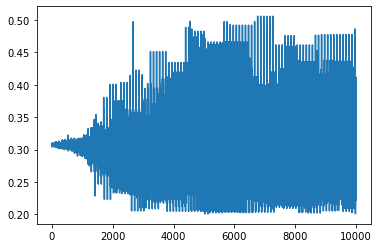

In [4]:
plt.plot(samplen[:,0])

In [5]:
import matplotlib.pylab as pl
colors = plt.cm.get_cmap('spring', len(samples_noSSC)-1)
c = [colors(i) for i in range(len(samples_noSSC)-1)]

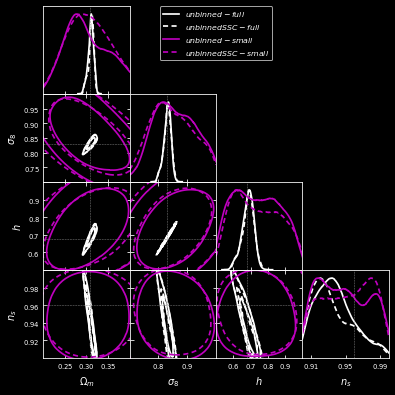

In [12]:
g = plots.get_subplot_plotter(subplot_size=1.4)
plt.style.use('dark_background')
#range_ = {'1':[0.2, .5], '2':[0.6,1], '3':[0.5, 1], '4':[0.9,1]}
range_ = {'1':[0.2, .4], '2':[0.7,1],'3':[0.5, 1], '4':[0.9,1]}
g.triangle_plot([samplenoSSCfull, sampleSSCfull, samplenoSSCsmall, sampleSSCsmall], filled=False, contour_colors = ['w', 'w', 'm', 'm'], contour_ls=['-', '--', '-', '--'],
                contour_lws=1.7,
                param_limits = range_,
                       fine_bins = 1,  marker_args = {'linewidth':2}, markers={'1':0.30711, '2':.8288, '3':0.6777,  '4':0.96})
#g.triangle_plot(samples_SSC[1], filled=False, contour_colors = [colors(i) for i in range(len(samples))], contour_ls='--',
#                contour_lws=2,
#                       fine_bins = 1,  marker_args = {'linewidth':2}, markers={'1':0.30711, '2':.8288})
plt.savefig('unbinned_noSSC_vs_SSC_full1.png', dpi = 300)